In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

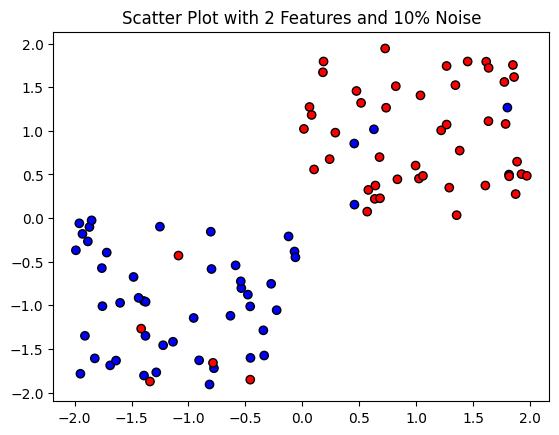

In [22]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate 50 samples for class 0 (negative class) with 2 features
X_class0 = np.random.uniform(-2, 0, (50, 2))

# Generate 50 samples for class 1 (positive class) with 2 features
X_class1 = np.random.uniform(0, 2, (50, 2))

# Combine the two classes into one dataset
X = np.vstack((X_class0, X_class1))

# Create corresponding labels (0 for class 0, 1 for class 1)
y_class0 = np.zeros(50)
y_class1 = np.ones(50)

# Combine the labels
y = np.hstack((y_class0, y_class1))

# Introduce noise by flipping 10% of the labels
num_noise_samples = int(0.1 * len(y))  # 10% noise
noise_indices = np.random.choice(len(y), size=num_noise_samples, replace=False)

# Flip the labels of the selected noise indices
y[noise_indices] = 1 - y[noise_indices]

# Visualize the data (2 features) with noise
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title('Scatter Plot with 2 Features and 10% Noise')
plt.show()


In [23]:

model = Sequential()

model.add(Dense(128, input_dim=2, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(X, y, epochs=500, validation_split= 0.2, verbose = 1)

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.5898 - loss: 0.5883 - val_accuracy: 0.9500 - val_loss: 0.2923
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8617 - loss: 0.4315 - val_accuracy: 0.9500 - val_loss: 0.3036
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8773 - loss: 0.4256 - val_accuracy: 0.9500 - val_loss: 0.2982
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9047 - loss: 0.3231 - val_accuracy: 0.9500 - val_loss: 0.2845
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9047 - loss: 0.3189 - val_accuracy: 0.9500 - val_loss: 0.2959
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8813 - loss: 0.3509 - val_accuracy: 0.9500 - val_loss: 0.3496
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8930 - loss: 0.3628 - val_accuracy: 0.9500 - val_loss: 0.3374
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9047 - loss: 0.3320 - val_accuracy: 0.9500 - val_loss: 0.3099
Epoc

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


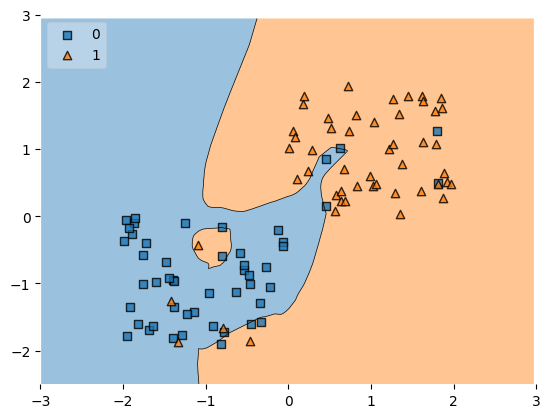

In [36]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf= model, legend=2)
plt.xlim(-3.0, 3.0)
plt.ylim(-2.5, 3.0)
plt.show()

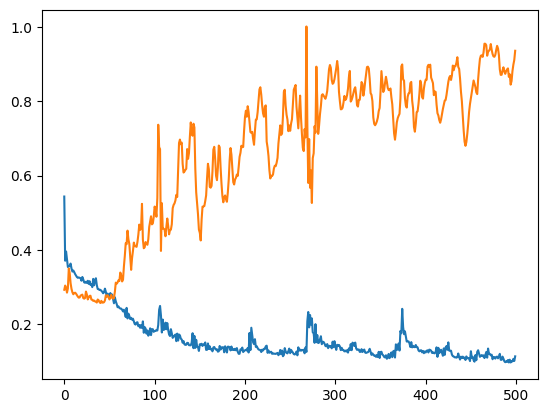

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# **Applying Dropout 20%**

In [54]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(X, y, epochs=500, validation_split=0.2, verbose = 0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


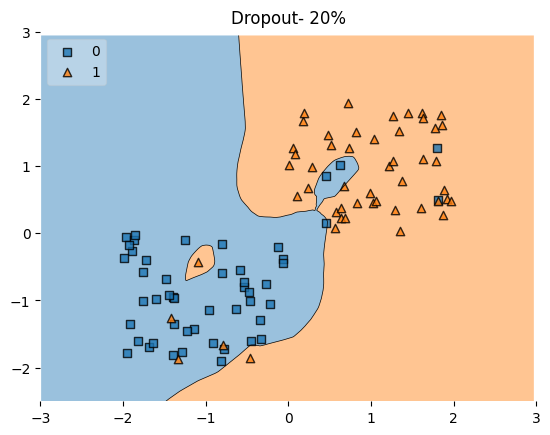

In [55]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf= model, legend=2)
plt.xlim(-3.0, 3.0)
plt.ylim(-2.5, 3.0)
plt.title("Dropout- 20%")
plt.show()

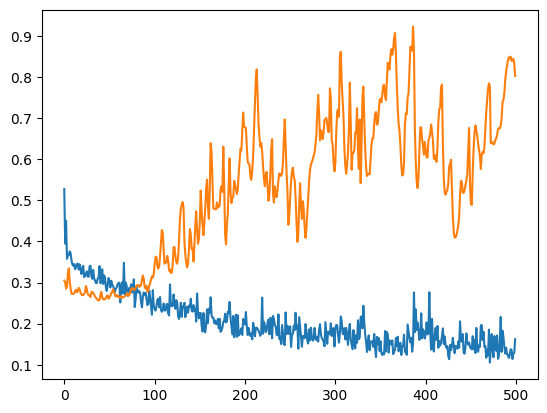

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# **# **Applying Dropout 50%****

In [47]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(X, y, epochs=500, validation_split=0.2, verbose = 1)

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.5977 - loss: 0.6632 - val_accuracy: 0.9500 - val_loss: 0.4298
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9086 - loss: 0.4015 - val_accuracy: 0.9500 - val_loss: 0.2835
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8734 - loss: 0.4305 - val_accuracy: 0.9500 - val_loss: 0.2915
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8891 - loss: 0.3736 - val_accuracy: 0.9500 - val_loss: 0.2956
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8930 - loss: 0.3964 - val_accuracy: 0.9500 - val_loss: 0.2908
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8891 - loss: 0.4065 - val_accuracy: 0.9500 - val_loss: 0.2790
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8930 - loss: 0.4178 - val_accuracy: 0.9500 - val_loss: 0.2804
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8930 - loss: 0.3728 - val_accuracy: 0.9500 - val_loss: 0.3011
Epo

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


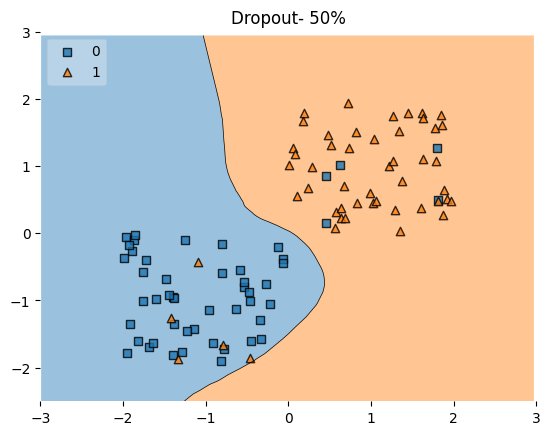

In [49]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf= model, legend=2)
plt.xlim(-3.0, 3.0)
plt.ylim(-2.5, 3.0)
plt.title("Dropout- 50%")
plt.show()

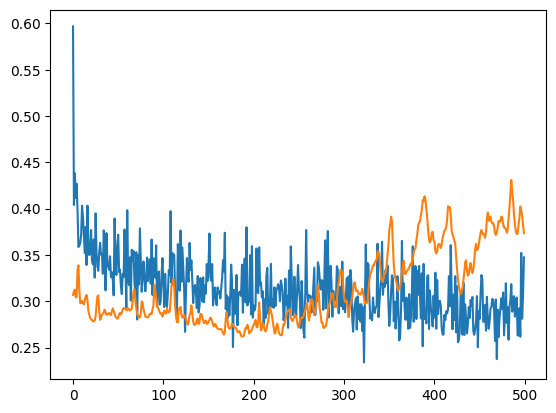

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [50]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation='relu'))
model.add(Dropout(0.75))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.75))
model.add(Dense(1, activation='sigmoid'))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(X, y, epochs=500, validation_split=0.2, verbose = 1)

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.4492 - loss: 0.7143 - val_accuracy: 0.9500 - val_loss: 0.4319
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8469 - loss: 0.4805 - val_accuracy: 0.9500 - val_loss: 0.3039
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8813 - loss: 0.3971 - val_accuracy: 0.9500 - val_loss: 0.2981
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8852 - loss: 0.3619 - val_accuracy: 0.9500 - val_loss: 0.3261
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8656 - loss: 0.5630 - val_accuracy: 0.9500 - val_loss: 0.3394
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8695 - loss: 0.5488 - val_accuracy: 0.9500 - val_loss: 0.3305
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8672 - loss: 0.5277 - val_accuracy: 0.9500 - val_loss: 0.3223
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8891 - loss: 0.5042 - val_accuracy: 0.9500 - val_loss: 0.3135
Epo

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


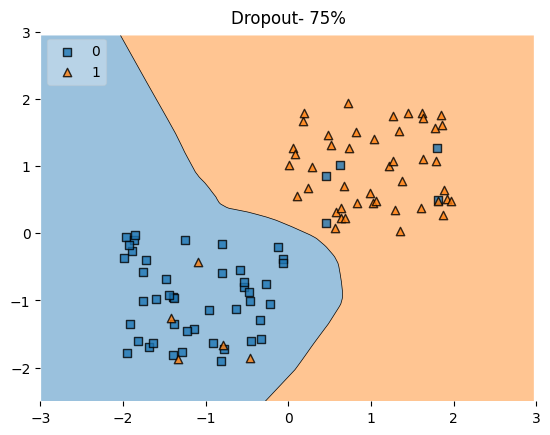

In [51]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf= model, legend=2)
plt.xlim(-3.0, 3.0)
plt.ylim(-2.5, 3.0)
plt.title("Dropout- 75%")
plt.show()

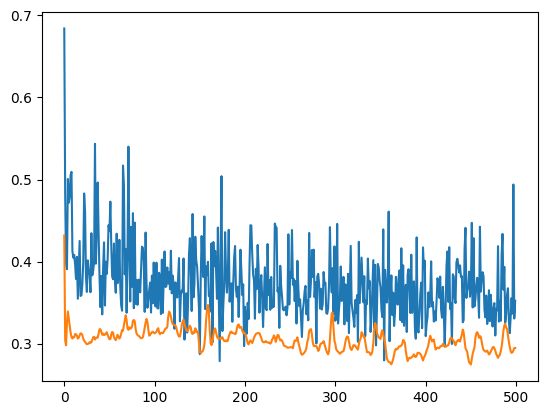

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])